# Polygon Maze Generation

In [9]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats, plot_smoother_stats
from utils import latexify
from table import latex_table
from definitions import *
import matplotlib as mpl
import numpy as np
import sys, os
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


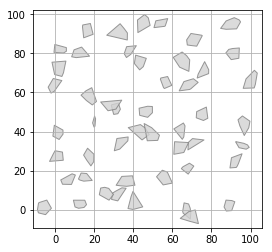

In [10]:
from polygon_maze_generator import PolygonMazeGenerator as PMG

obstacles = []
spacing = 15
for x in range(0, 100, spacing):
    for y in range(0, 100, spacing):
        offset = np.random.randn(2) * 5
        obstacles.append(PMG.create_convex() + np.array([x, y]) + offset)
PMG.save_svg(obstacles, "test.svg")
PMG.plot(obstacles)

Running MPB with ID test (log file at test.log)...


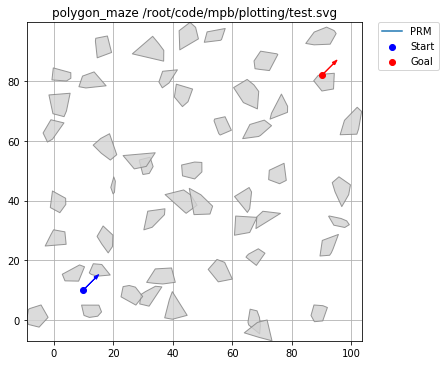

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze /root/code/mpb/plotting/test.svg
+ Planners:        PRM
+ Found solution:  0 / 1
+ Exact solution:  0 / 1
+ Found colliding: 0 / 0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [11]:
m = MPB()
m["max_planning_time"] = 30
m.set_start(10., 10., 45 * np.pi / 180)
m.set_goal(90., 82., 45 * np.pi / 180)
m.set_polygon_env(os.path.abspath("test.svg"))
m.set_planners(['prm'])
if m.run(id="test", runs=1) == 0:
    m.visualize_trajectories(draw_start_goal_thetas=True, plot_every_nth_polygon=10, silence=True)
    m.print_info()

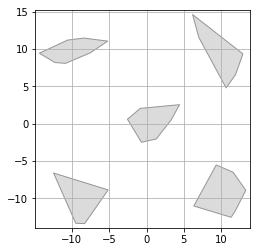

In [12]:
size = 10
obstacles = [
    PMG.create_convex(),
    PMG.create_convex() + np.array([-size, -size]),
    PMG.create_convex() + np.array([size, -size]),
    PMG.create_convex() + np.array([size, size]),
    PMG.create_convex() + np.array([-size, size])
]
PMG.save_svg(obstacles, "simple.svg")
PMG.plot(obstacles)

Running MPB with ID test_scaling (log file at test_scaling.log)...


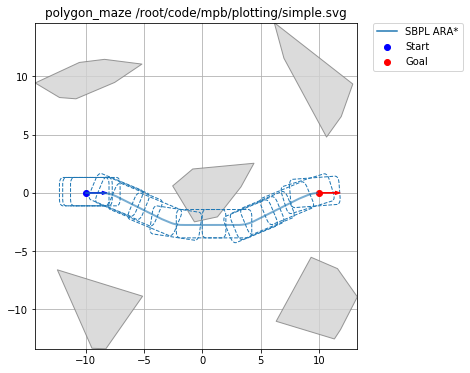

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze /root/code/mpb/plotting/simple.svg
+ Planners:        SBPL_ARAstar
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [13]:
m = MPB()
m["max_planning_time"] = 30
m.set_start(-10., 0., 0.)
m.set_goal(10., 0., 0.)
m.set_polygon_env(os.path.abspath("simple.svg"))
m.set_planners(['sbpl_arastar'])
m["sbpl.scaling"] = 1
if m.run(id="test_scaling", show_progress_bar=True, runs=1) == 0:
    m.visualize_trajectories(draw_start_goal_thetas=True, plot_every_nth_polygon=10, silence=True)
    m.print_info()

In [14]:
m["sbpl.resolution"]

0.25

Running MPB with ID test_scaling (log file at test_scaling.log)...


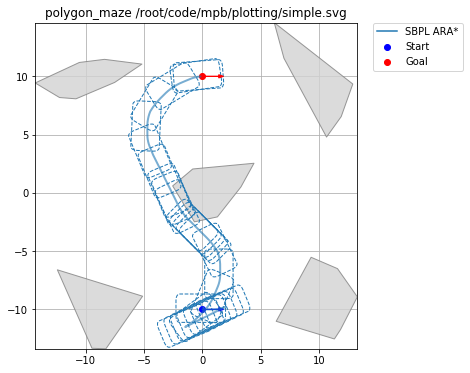

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze /root/code/mpb/plotting/simple.svg
+ Planners:        SBPL_ARAstar
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [16]:
m = MPB()
m["max_planning_time"] = 30
m.set_start(0., -10.0, 0.)
m.set_goal(0., 10, 0.)
m.set_polygon_env(os.path.abspath("simple.svg"))
m.set_planners(['sbpl_arastar'])
m["sbpl.scaling"] = 1
if m.run(id="test_scaling", show_progress_bar=True, runs=1) == 0:
    m.visualize_trajectories(draw_start_goal_thetas=True, plot_every_nth_polygon=10, silence=True)
    m.print_info()